<a href="https://colab.research.google.com/github/pushyag1/NLPClass/blob/master/Imdb_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the imdb-reviews_2.csv file.

• Load the data

• Count the number of positive and negative sentiment

• Clean the text ‘review’ and create a column called ‘review_processed’

• Replace short words as
df['review_processed'] = df['review_processed'].apply(lambda x:
' '.join([w for w in x.split() if len(w)>2]))

• Make entire text lowercase

• Remove stopwords

• Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
and ‘even’

• Add to the list of words

• Lemmatize the text

• Convert NLTK tags into ‘wordnet’ tags

• Find the part of speech tag

• Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
each token

• Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
Else, use the tag to lemmatize the token

• Plot the most frequent words from positive reviews using bar chart. Subset
positive review dataset, extract words into list and count frequency. Subset top
30 words by frequency in a horizontal bar chart

• Create a word cloud

• Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data
set into train and test (20%) set

• Use the GaussianNB to train the model on the training data. Provide the
accuracy of the model

• Test the model on the test set

• Create the confusion matrix and classification report

• Use Seaborn heatmap to show TP, FP, TN, FN values

• Use a logistic regression model and check the accuracy of the model for C=0.01,
0.05, 0.5, 0.5, and 1.

• Provide the ROC curve. What is the area under the curve?

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('imdb-reviews_2.csv')
print(df.shape)
df.head(1)

(5000, 2)


,review,label
0,"first think another Disney movie, might good, ...",1


In [4]:
# Review Frquency Count
vc_df = pd.DataFrame(df['label'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'Positive', 0: 'Negative'}) 
vc_df

,Sentiment,Count
0,Positive,2528
1,Negative,2472


In [5]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z#]", " ") 


# Re ordering columns
df = df[['review','review_processed','label']]

In [6]:
df

,review,review_processed,label
0,"first think another Disney movie, might good, ...",first think another Disney movie might good ...,1
1,"Put aside Dr. House repeat missed, Desperate H...",Put aside Dr House repeat missed Desperate H...,0
2,"big fan Stephen King's work, film made even gr...",big fan Stephen King s work film made even gr...,1
3,watched horrid thing TV. Needless say one movi...,watched horrid thing TV Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,truly enjoyed film acting terrific plot Jeff...,1
...,...,...,...
4995,Whenever people ask name scariest movie I've e...,Whenever people ask name scariest movie I ve e...,1
4996,review applies cut film that's generally avail...,review applies cut film that s generally avail...,0
4997,"There's little get excited ""Dan Real Life"". Fi...",There s little get excited Dan Real Life Fi...,0
4998,"Twisted, bizarre, enchanting, hilarious! could...",Twisted bizarre enchanting hilarious could...,1


In [7]:
# Replacing short words
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [8]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [9]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
stop_words = stopwords.words('english')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

In [11]:
# Begin Lemmatization 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') # Run atleast once

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

In [13]:
# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

In [14]:
df

,review,review_processed,label
0,"first think another Disney movie, might good, ...",first think another disney might good kid watc...,1
1,"Put aside Dr. House repeat missed, Desperate H...",put aside house repeat miss desperate housewif...,0
2,"big fan Stephen King's work, film made even gr...",big fan stephen king work make great fan king ...,1
3,watched horrid thing TV. Needless say one movi...,watch horrid thing needless say movie watch se...,0
4,truly enjoyed film. acting terrific plot. Jeff...,truly enjoyed act terrific plot jeff combs tal...,1
...,...,...,...
4995,Whenever people ask name scariest movie I've e...,whenever people ask name scary ever see invari...,1
4996,review applies cut film that's generally avail...,review applies cut generally available fury wo...,0
4997,"There's little get excited ""Dan Real Life"". Fi...",little get excite dan real life first whole se...,0
4998,"Twisted, bizarre, enchanting, hilarious! could...",twisted bizarre enchant hilarious stop laugh w...,1


In [15]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

In [16]:
# Subset positive review dataset
all_words_df = df[df['label'] == 1]



In [17]:
# Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df ['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)


In [18]:

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})



In [19]:
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)



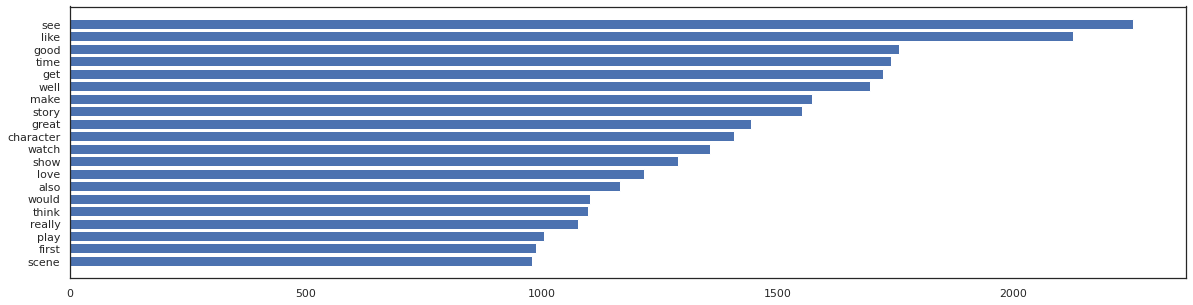

In [20]:
# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
#ax.set(ylabel = 'count')
plt.show()

In [21]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df[df['label'] == 1]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

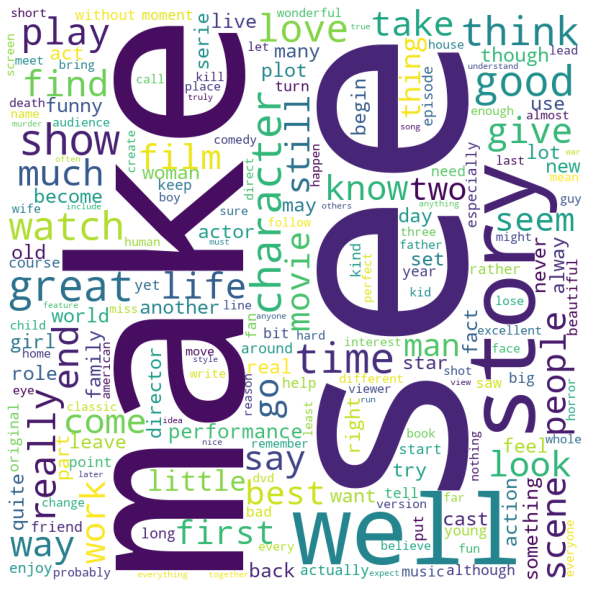

In [22]:
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [23]:
# Importing module
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(df.review_processed).toarray()
y = df.label.values


In [25]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [26]:
## Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[416 101]
 [176 307]]
The model accuracy is 0.723


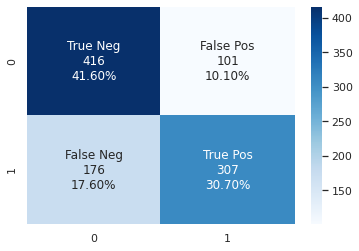

In [28]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')


In [29]:
#https://medium.com/analytics-vidhya/natural-language-processing-from-scratch-sentiment-analysis-e09711d4f7eb